<a href="https://colab.research.google.com/github/bakhtkhan123/Deep-Learning-BWF-BakhtUllah/blob/main/Task20/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from keras import models
from keras import layers
from keras.datasets import imdb

In [39]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [40]:
train_data.shape

(25000,)

In [41]:
test_data.shape

(25000,)

In [42]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [43]:
test_data[0]

[1,
 591,
 202,
 14,
 31,
 6,
 717,
 10,
 10,
 2,
 2,
 5,
 4,
 360,
 7,
 4,
 177,
 5760,
 394,
 354,
 4,
 123,
 9,
 1035,
 1035,
 1035,
 10,
 10,
 13,
 92,
 124,
 89,
 488,
 7944,
 100,
 28,
 1668,
 14,
 31,
 23,
 27,
 7479,
 29,
 220,
 468,
 8,
 124,
 14,
 286,
 170,
 8,
 157,
 46,
 5,
 27,
 239,
 16,
 179,
 2,
 38,
 32,
 25,
 7944,
 451,
 202,
 14,
 6,
 717]

In [44]:
max([max(sequence) for sequence in train_data])

9999

In [45]:
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decode_review= ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [46]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Encoding the Integer sequences into a binary matrix

In [47]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [48]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [49]:
network=models.Sequential()
network.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
network.add(layers.Dense(16,activation='relu'))
network.add(layers.Dense(1,activation='sigmoid'))

In [50]:
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

## Configure Optimizer

In [51]:
from keras import optimizers
network.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [52]:
from keras import losses
from keras import metrics
network.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

## Setting Validation Set

In [53]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

In [54]:
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [55]:
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:

history=network.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.5365 - accuracy: 0.7710 - val_loss: 0.4021 - val_accuracy: 0.8610
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3256 - accuracy: 0.8963 - val_loss: 0.3133 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2377 - accuracy: 0.9232 - val_loss: 0.2837 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1916 - accuracy: 0.9355 - val_loss: 0.2729 - val_accuracy: 0.8913
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1576 - accuracy: 0.9485 - val_loss: 0.3101 - val_accuracy: 0.8750
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1381 - accuracy: 0.9543 - val_loss: 0.2958 - val_accuracy: 0.8821
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1164 - accuracy: 0.9632 - val_loss: 0.2986 - val_accuracy: 0.8862
Epoch 8/20
30

In [57]:
history_dict=history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Plotting Training and Validation Loss

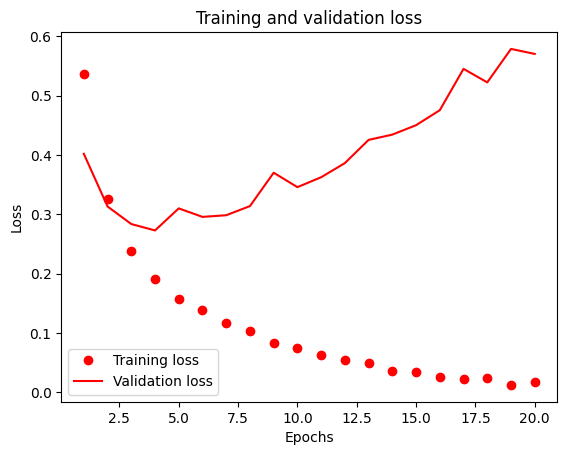

In [58]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy=history_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting Traing and Validation Accuracy

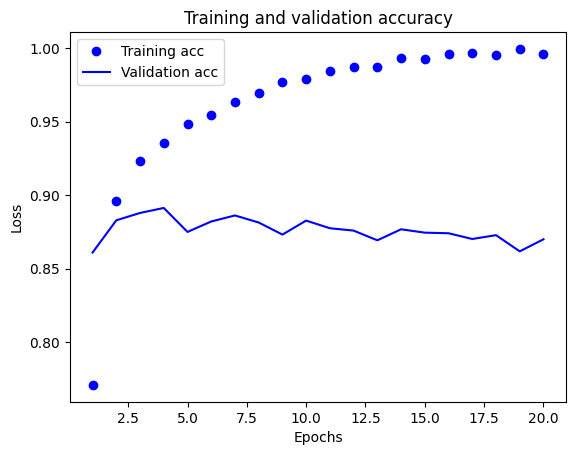

In [64]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Retrain and Evaluate

In [65]:
network.fit(x_train, y_train, epochs=4, batch_size=512)
results = network.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2085 - accuracy: 0.9456
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1325 - accuracy: 0.9607
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1037 - accuracy: 0.9683
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.4512 - accuracy: 0.8635


In [66]:
results

[0.4511812627315521, 0.8635200262069702]

## Making Prediction

In [67]:
network.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.02963158],
       [0.9999999 ],
       [0.11821774],
       ...,
       [0.0761366 ],
       [0.01705508],
       [0.91283655]], dtype=float32)